In [1]:
%matplotlib inline


# CSD Demo


Compute the cross spectral density of two signals


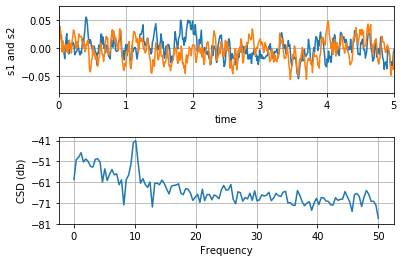

In [2]:
import numpy as np
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (db)')
plt.show()